In [43]:
items = (
    ("map", 9, 150), ("compass", 13, 35), ("water", 153, 200), ("sandwich", 50, 160),
    ("glucose", 15, 60), ("tin", 68, 45), ("banana", 27, 60), ("apple", 39, 40),
    ("cheese", 23, 30), ("beer", 52, 10), ("suntan cream", 11, 70), ("camera", 32, 30),
    ("t-shirt", 24, 15), ("trousers", 48, 10), ("umbrella", 73, 40),
    ("waterproof trousers", 42, 70), ("waterproof overclothes", 43, 75),
    ("note-case", 22, 80), ("sunglasses", 7, 20), ("towel", 18, 12),
    ("socks", 4, 50), ("book", 30, 10),
    )

In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
MAX_WEIGHT = 400
NO_OF_ITEMS = len(items)

In [46]:
####MUTATION FLIPBIT
####CROSSOVER TWOPOINT
####TOURNAMENT SIZE=3

In [47]:
POPULATION_SIZE = 100
MAX_GENERATIONS = 100
P_MUTATION = 0.1
P_CROSS_OVER = 0.9

In [48]:
def getValue(Individual,items,MAX_WEIGHT):
    totalWeight = totalValue = 0
    for i in range(len(Individual)):
        item, weight, value = items[i]
        if totalWeight + weight <= MAX_WEIGHT:
            totalWeight += Individual[i] * weight
            totalValue += Individual[i] * value
    return totalValue

In [49]:
def get_population_fitness(POPULATION,items,MAX_WEIGHT):
    population_fitness = [getValue(i,items,MAX_WEIGHT) for i in POPULATION]
    return population_fitness


In [50]:
def tournament_selection(fitness_values,TOURNAMENT_SIZE=3):
    selected_indices = []
    while len(selected_indices) != len(fitness_values):
        tournament_indices = []
        tournament_fitness_values = []
        while len(tournament_indices) != TOURNAMENT_SIZE:
            indi = np.random.randint(0,len(fitness_values))
            tournament_indices.append(indi)
            tournament_fitness_values.append(fitness_values[indi])
        winner = np.argmax(tournament_fitness_values)
        selected_indices.append(tournament_indices[winner])
    return selected_indices

In [51]:
def mutation(population,P_MUTATION):
    for i in range(len(population)):
        for j in range(len(population[i])):
            if np.random.uniform() < P_MUTATION:
                if population[i][j] == 1:
                    population[i][j] = 0
                else:
                    population[i][j] = 1
    return population

In [52]:
def cross_over(population,selected_indices,P_CROSSOVER):
    new_population = []
    while len(new_population) != len(selected_indices):
        indiv1 = np.random.randint(0,len(selected_indices))
        indiv2 = np.random.randint(0,len(selected_indices))
        indiv1 = population[selected_indices[indiv1]]
        indiv2 = population[selected_indices[indiv2]]
        if np.random.uniform() > P_CROSSOVER:
            new_population.append(indiv1)
            new_population.append(indiv2)
            continue
        pt1 = np.random.randint(0,len(population[0]))
        pt2 = np.random.randint(pt1,len(population[0]))
        new_indiv1 = np.concatenate((indiv1[0:pt1],indiv2[pt1:pt2],indiv1[pt2:]),axis=None)
        new_indiv2 = np.concatenate((indiv2[0:pt1],indiv1[pt1:pt2],indiv2[pt2:]),axis=None)
        new_population.append(new_indiv1)
        new_population.append(new_indiv2)
    return new_population

In [53]:
POPULATION = np.random.randint(0,2,size=(POPULATION_SIZE,NO_OF_ITEMS))

In [54]:
AVERAGE_VALUE = []
MAX_VALUE = []
for generation in range(MAX_GENERATIONS):
    print(f"{generation}")
    population_fitness = get_population_fitness(POPULATION,items,MAX_WEIGHT)
    AVERAGE_VALUE.append(np.mean(population_fitness))
    MAX_VALUE.append(np.max(population_fitness))
    selected_indices = tournament_selection(population_fitness)
    print(f"SELECTION DONE")
    POPULATION = cross_over(POPULATION,selected_indices,P_CROSS_OVER)
    print(f"CROSSOVER DONE")
    POPULATION = mutation(POPULATION,P_MUTATION)
    print(f"MUTATION DONE")
    print("**************************************************************************")

0
SELECTION DONE
CROSSOVER DONE
MUTATION DONE
**************************************************************************
1
SELECTION DONE
CROSSOVER DONE
MUTATION DONE
**************************************************************************
2
SELECTION DONE
CROSSOVER DONE
MUTATION DONE
**************************************************************************
3
SELECTION DONE
CROSSOVER DONE
MUTATION DONE
**************************************************************************
4
SELECTION DONE
CROSSOVER DONE
MUTATION DONE
**************************************************************************
5
SELECTION DONE
CROSSOVER DONE
MUTATION DONE
**************************************************************************
6
SELECTION DONE
CROSSOVER DONE
MUTATION DONE
**************************************************************************
7
SELECTION DONE
CROSSOVER DONE
MUTATION DONE
**************************************************************************
8
SELECTION DONE
CROSSOVER DONE


CROSSOVER DONE
MUTATION DONE
**************************************************************************
82
SELECTION DONE
CROSSOVER DONE
MUTATION DONE
**************************************************************************
83
SELECTION DONE
CROSSOVER DONE
MUTATION DONE
**************************************************************************
84
SELECTION DONE
CROSSOVER DONE
MUTATION DONE
**************************************************************************
85
SELECTION DONE
CROSSOVER DONE
MUTATION DONE
**************************************************************************
86
SELECTION DONE
CROSSOVER DONE
MUTATION DONE
**************************************************************************
87
SELECTION DONE
CROSSOVER DONE
MUTATION DONE
**************************************************************************
88
SELECTION DONE
CROSSOVER DONE
MUTATION DONE
**************************************************************************
89
SELECTION DONE
CROSSOVER DONE
MUTATION 

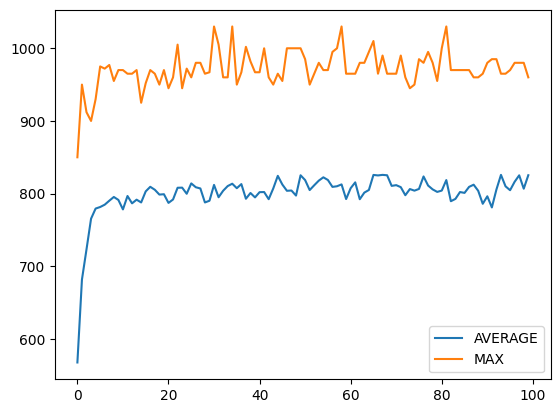

In [55]:
plt.plot(AVERAGE_VALUE)
plt.plot(MAX_VALUE)
plt.legend(['AVERAGE','MAX'])
plt.show()

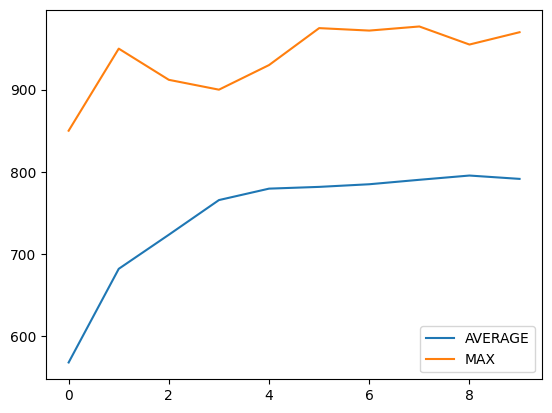

In [56]:
plt.plot(AVERAGE_VALUE[:10])
plt.plot(MAX_VALUE[:10])
plt.legend(['AVERAGE','MAX'])
plt.show()